# Seminar about Markovitz model. Idea of usage this model is find optimal weights for each share in portfolio. 

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import cvxopt as opt
# from cvxopt import blas, solvers
import pandas as pd

In [ ]:
for ticker in ['XOM', 'TSLA', 'MSFT', 'JNJ', 'BAC', 'AMZN']:
    print(ticker)
    exec("{0} = pd.read_csv('Downloads/{0}.csv').set_index('Date')".format(ticker))
#     exec("a = {0}.describe()".format(ticker))
    print(a)

In [33]:
selected = ['XOM', 'TSLA', 'MSFT', 'JNJ', 'BAC', 'AMZN']
df = pd.DataFrame()
for ticker in selected:
    exec("d = {}[['Close']]".format(ticker))
    sa = ticker
    exec("d['ticker'] = sa")
    exec("df = df.append(d)")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
data = df.pivot(columns = 'ticker')
data.describe()

Close                                                          
ticker         AMZN        BAC         JNJ        MSFT        TSLA        XOM
count     24.000000  24.000000   24.000000   24.000000   24.000000  24.000000
mean    1116.919993  25.142083  126.391249   77.097499  290.050834  82.297501
std      332.857266   4.809263    8.551538   15.049843   55.326981   3.853577
min      749.869995  15.650000  111.300003   57.459999  189.399994  74.610001
25%      843.107483  22.582499  119.550001   64.482501  251.444996  80.672502
50%      984.190002  24.470000  127.319996   73.594998  301.375000  81.995002
75%     1448.227478  29.160001  132.309993   91.832497  341.032509  83.702499
max     1779.219971  32.099998  139.720001  105.370003  361.609985  90.260002

In [39]:
returns_daily = data.pct_change()
returns_annual = returns_daily.mean() * 12

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 12

In [98]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
assert sum(weights) == 1

AssertionError: 

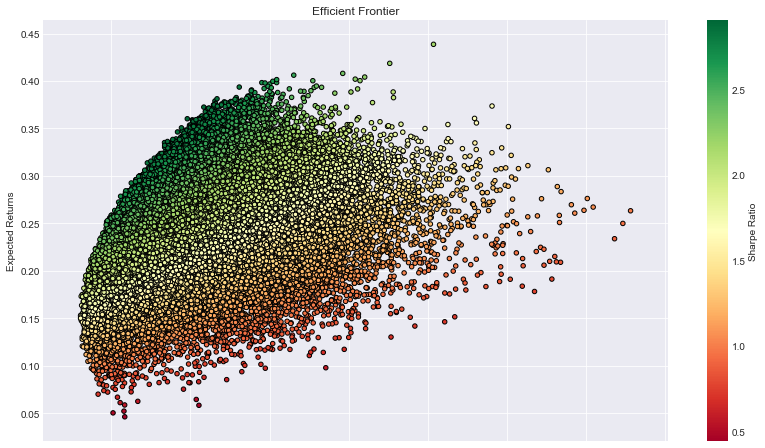

In [51]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 100000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(14, 8), grid=True)
plt.gcf().subplots_adjust(bottom=0.15)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

Sharpe is red, min_variance is blue


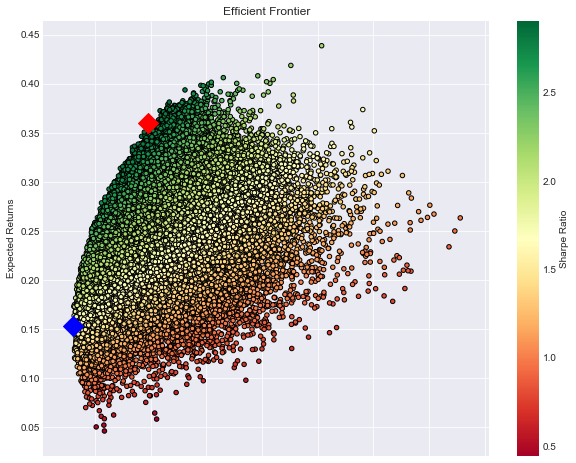

In [122]:
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
print('Sharpe is red, min_variance is blue')
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [55]:
df

,Returns,Volatility,Sharpe Ratio,XOM Weight,TSLA Weight,MSFT Weight,JNJ Weight,BAC Weight,AMZN Weight
0,0.233937,0.102808,2.275483,0.153491,0.193579,0.154092,0.241808,0.020115,0.236916
1,0.184193,0.137798,1.336686,0.017537,0.260517,0.115911,0.032218,0.281747,0.292070
2,0.244406,0.135427,1.804699,0.192511,0.161804,0.030999,0.122729,0.239401,0.252557
3,0.250543,0.143004,1.752005,0.235246,0.078525,0.157940,0.128542,0.262461,0.137286
4,0.259966,0.124797,2.083114,0.232963,0.161895,0.111710,0.130082,0.185821,0.177530
5,0.235922,0.108133,2.181770,0.246048,0.203597,0.160055,0.104724,0.019712,0.265864
6,0.222392,0.097688,2.276566,0.149205,0.105830,0.258956,0.293144,0.016305,0.176560
7,0.283095,0.117987,2.399375,0.302883,0.272954,0.116921,0.087925,0.023313,0.196005
8,0.305565,0.179943,1.698125,0.228987,0.177501,0.094588,0.100188,0.394388,0.004349
9,0.258686,0.147657,1.751935,0.195896,0.088641,0.237222,0.153332,0.294440,0.030470


In [56]:
max_ret = df['Returns'].max()

df.loc[df['Returns'] == max_ret]

,Returns,Volatility,Sharpe Ratio,XOM Weight,TSLA Weight,MSFT Weight,JNJ Weight,BAC Weight,AMZN Weight
57662,0.438655,0.201764,2.174098,0.813236,0.033274,0.007705,0.132768,0.000457,0.012559


In [57]:
min_variance_port

,Returns,Volatility,Sharpe Ratio,XOM Weight,TSLA Weight,MSFT Weight,JNJ Weight,BAC Weight,AMZN Weight
10821,0.152739,0.090324,1.69101,0.014056,0.032433,0.323915,0.336843,0.037839,0.254913


In [110]:
sharpe_portfolio

,Returns,Volatility,Sharpe Ratio,XOM Weight,TSLA Weight,MSFT Weight,JNJ Weight,BAC Weight,AMZN Weight
65212,0.360228,0.124025,2.904476,0.20342,0.212405,0.004413,0.519192,0.058276,0.002295


In [59]:
print(min_variance_port.T)
print(sharpe_portfolio.T)

                 10821
Returns       0.152739
Volatility    0.090324
Sharpe Ratio  1.691010
XOM Weight    0.014056
TSLA Weight   0.032433
MSFT Weight   0.323915
JNJ Weight    0.336843
BAC Weight    0.037839
AMZN Weight   0.254913
                 65212
Returns       0.360228
Volatility    0.124025
Sharpe Ratio  2.904476
XOM Weight    0.203420
TSLA Weight   0.212405
MSFT Weight   0.004413
JNJ Weight    0.519192
BAC Weight    0.058276
AMZN Weight   0.002295


## Check our choses for august profitability and check would it be in confidence interval?

In [120]:
m = {'XOM':[79.89, 81.51], 'AMZN':[2012.71, 1777.44], 'JNJ':[134.69, 132.52], 'MSFT':[111.95, 106.8], 'BAC':[30.93, 30.88], 'TSLA':[301.66, 298.14]}
set_ = {}
for ticker in selected:
    pr = m[ticker][0]/m[ticker][1]
    set_.update({'{}'.format(ticker):pr})
set1 = {}
for ticker in selected:
    col = ticker + ' Weight'
    a = min_variance_port[col].values[0]
    b = sharpe_portfolio[col].values[0]
    c = df.loc[df['Returns'] == max_ret][col].values[0]
    a *= set_[ticker]*a
    b *= set_[ticker]*b
    c *= set_[ticker]*c
    set1.update({'{}'.format(ticker):[a, b, c]})
    
    a = min_variance_port['Returns'].values[0]
    b = sharpe_portfolio['Returns'].values[0]
    c = df.loc[df['Returns'] == max_ret]['Returns'].values[0]
    
    
    

In [121]:
s1 = pd.DataFrame(set1)
s1['type'] = ['min_variance_port', 'sharpe_portfolio', 'max_return']
s1['mean_profit'] = [a, b, c]
s1['profit'] = s1['XOM'] + s1['TSLA'] + s1['MSFT'] + s1['JNJ'] + s1['BAC'] + s1['AMZN']

s1

,AMZN,BAC,JNJ,MSFT,TSLA,XOM,type,mean_profit,profit
0,0.073582,1.434136e-03,0.115321,0.109981,0.001064,0.000194,min_variance_port,0.152739,0.301576
1,0.000006,3.401604e-03,0.273974,0.000020,0.045649,0.040557,sharpe_portfolio,0.360228,0.363608
2,0.000179,2.092420e-07,0.017916,0.000062,0.001120,0.648209,max_return,0.438655,0.667486


## Obviusly that only sharpe_portfolio has result in august  in confidence interval with profitability with 36%. The best portfolio is max sharpe choosed weights for shares